In [1]:
%cd ~/github/agn_lf/
import source.astro_functions as af
import source.table_functions as tf
import source.lf_xi2 as xi2
import source.lf_vmax as vmax
import numpy as np
import matplotlib.pyplot as plt

/Users/runburg/github/agn_lf


In [2]:
# use table with agn_flag
from astropy.io import fits
import astropy.table as table
catalog = fits.open("data/Anna_Nick_Tractor_photometry_samplev9_MASTER.fits", memmap=True)
# ct = table.Table(catalog[1].data)
# flagged_agn = ct[np.where(ct['agn_flag'] == 1)]
# flagged_agn = table.Table(flagged_agn, masked=True, copy=False)
# # for col in flagged_agn.columns.values():
# #     try:
# #         col.mask = np.isnan(col)
# #     except TypeError:
# #         continue
# flagged_agn.write('./data/flagged_agn.fits', format='fits')
flagged_agn = table.Table.read('./data/flagged_agn.fits')

In [3]:
band = 'Mag_U_CFHT'
band_err = 'Mag_err_U_CFHT'
z_cols = ('zSpec', 'z_eazy')
mid = 'Mag_U_CFHT_abs'
band_vmax = 'Mag_U_CFHT_Vmax'
# mid, low, high = tf.add_abs_mag_and_err_to_table(flagged_agn, band, band_err, z_cols)
# band_vmax = vmax.add_V_max_to_table(flagged_agn, band, band_err, mid, ('zSpec', 'z_eazy'))
# flagged_agn.write('./data/flagged_agn_w_mag_and_vmax.fits')
flagged_agn = table.Table.read('./data/flagged_agn_w_mag_and_vmax.fits')

In [4]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -18)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=np.ones(len(flagged_agn[mid])), vmax_band=band)
flagged_agn[band].data

/Users/runburg/github/agn_lf/source/lf_vmax.py:220: RuntimeWarning: invalid value encountered in less
  in_bin = (bins[i - 1] < data_table[band].data) & (data_table[band].data < bins[i])


array([22.606075,       nan, 22.587841, ..., 19.483315, 22.185135,
       20.052412], dtype=float32)

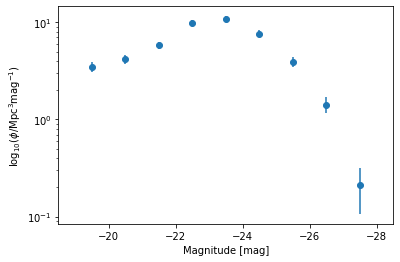

In [5]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [6]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -18)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=vmax.example_selection_func(flagged_agn[mid]), vmax_band=band)
flagged_agn[band].data

array([22.606075,       nan, 22.587841, ..., 19.483315, 22.185135,
       20.052412], dtype=float32)

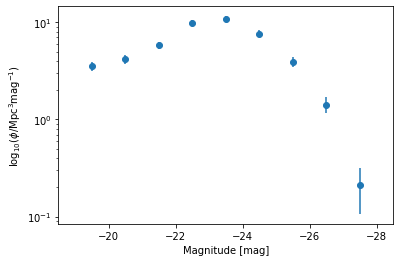

In [7]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [8]:
# print(vmax_counts)
odr_out = xi2.odr_fit(*vmax_counts, initial_guesses=(10, -24, 0.05, -.5))


Beta: [ 18.52412905 -24.3443023   -0.60172412  -2.41757947]
Beta Std Error: [1.30461441 0.26906234 0.05047366 0.18429856]
Beta Covariance: [[2.32413598 0.27918746 0.0742625  0.15141591]
 [0.27918746 0.098856   0.01528862 0.05720239]
 [0.0742625  0.01528862 0.00347878 0.00838362]
 [0.15141591 0.05720239 0.00838362 0.0463811 ]]
Residual Variance: 0.7323232196579643
Inverse Condition #: 0.0038136289977775428
Reason(s) for Halting:
  Sum of squares convergence


In [9]:
odr_out.beta

array([ 18.52412905, -24.3443023 ,  -0.60172412,  -2.41757947])

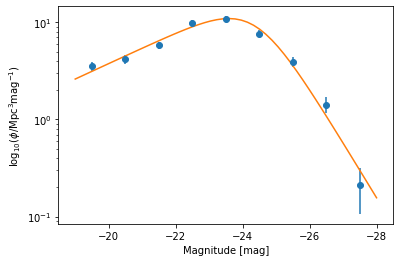

In [10]:
x_vals = np.linspace(min(bins), max(bins))
ax.plot(x_vals, xi2.double_power_law(odr_out.beta, x_vals))
fig

In [11]:
flagged_agn[band, band_vmax]

Mag_U_CFHT,Mag_U_CFHT_Vmax
,Mpc3
float32,float64
22.606075,2321532824.8403134
nan,0.0
22.587841,2321532824.8403134
20.490723,2321532824.8403134
21.727146,2321532824.8403134
21.664654,2321532824.8403134
21.24732,2321532824.8403134
22.805641,2321532824.8403134


In [12]:
catalog = fits.open("data/Anna_Nick_Tractor_photometry_samplev9_MASTER.fits", memmap=True)
ct = table.Table(catalog[1].data)

In [13]:
import source.selection_criteria as sc

flux36 = 'flux_ap2_36'
flux45 = 'flux_ap2_45'
flux58 = 'flux_ap2_58'
flux80 = 'flux_ap2_80'

# try:
#     for i in range(len(ct)):
#         ct[flux36][i] > 10
# except TypeError:
#     print(i, ": ", ct[i])
agn_candidates = sc.select_ir(ct, flux36, flux45, flux58, flux80, selection_cuts='lacy05')
lacy_selected = ct[agn_candidates]

/Users/runburg/github/agn_lf/source/selection_criteria.py:49: RuntimeWarning: invalid value encountered in log10
  lf80_45 = np.log10(flux8_0 / flux4_5)
/Users/runburg/github/agn_lf/source/selection_criteria.py:50: RuntimeWarning: invalid value encountered in log10
  lf58_36 = np.log10(flux5_8 / flux3_6)
/usr/local/lib/python3.8/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/local/lib/python3.8/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [14]:
band = 'Mag_U_CFHT'
band_err = 'Mag_err_U_CFHT'
z_cols = ('zSpec', 'z_eazy')
mid = 'Mag_U_CFHT_abs'
band_vmax = 'Mag_U_CFHT_Vmax'
mid, low, high = tf.add_abs_mag_and_err_to_table(lacy_selected, band, band_err, z_cols)
band_vmax = vmax.add_V_max_to_table(lacy_selected, band, band_err, mid, ('zSpec', 'z_eazy'))

vmax_counts = vmax.v_max_counts(lacy_selected, bins, mid, selection_function=np.ones(len(lacy_selected)), vmax_band=band)

Mag is nan for Object 16188                    
Mag is nan for Object 16999                    
Mag is nan for Object 18482                    
Mag is nan for Object 19102                    
Mag is nan for Object 20318                    
Mag is nan for Object 24772                    
Mag is nan for Object 26946                    
Mag is nan for Object 27108                    
Mag is nan for Object 29350                    
Mag is nan for Object 31462                    
Mag is nan for Object 31722                    
Mag is nan for Object 37136                    
Mag is nan for Object 39295                    
Mag is nan for Object 40559                    
Mag is nan for Object 43465                    
Mag is nan for Object 44471                    
Mag is nan for Object 44876                    
Mag is nan for Object 45850                    
Mag is nan for Object 46542                    
Mag is nan for Object 46933                    
Mag is nan for Object 53404             

/Users/runburg/github/agn_lf/source/astro_functions.py:52: RuntimeWarning: divide by zero encountered in log10
  return mag_app - 5 * np.log10(cosmo.luminosity_distance(z).to(u.pc).value / 10) - k_correction(z)


Mag is nan for Object 1087541                  
Mag is nan for Object 1089612                  
Mag is nan for Object 1091194                  
Mag is nan for Object 1091253                  
Mag is nan for Object 1094848                  
Mag is nan for Object 1106758                  
Mag is nan for Object 1115278                  
Mag is nan for Object 1118490                  
Mag is nan for Object 1122136                  
Mag is nan for Object 1122354                  
Mag is nan for Object 1123536                  
Mag is nan for Object 1124017                  
Mag is nan for Object 1126344                  
Mag is nan for Object 1127021                  
Mag is nan for Object 1127468                  
Mag is nan for Object 1130233                  
Mag is nan for Object 1135863                  
Mag is nan for Object 1135875                  
Mag is nan for Object 1136764                  
Mag is nan for Object 1138085                  
Mag is nan for Object 1138143           

Mag is nan for Object 798179                   
Mag is nan for Object 799372                   
Mag is nan for Object 799436                   
Mag is nan for Object 815383                   
Mag is nan for Object 837921                   
Mag is nan for Object 847960                   
Mag is nan for Object 868433                   
Mag is nan for Object 887679                   
Mag is nan for Object 915782                   
Mag is nan for Object 923812                   
Mag is nan for Object 967599                   
Mag is nan for Object 970767                   
Mag is nan for Object 976122                   
Mag is nan for Object 983660                   
Mag is nan for Object 986643                   
Mag is nan for Object 989659                   
Mag is nan for Object 990606                   
Mag is nan for Object 996097                   
Mag is nan for Object 996637                   
Mag is nan for Object 998552                   
Mag is nan for Object 1000195           

/Users/runburg/github/agn_lf/source/lf_vmax.py:220: RuntimeWarning: invalid value encountered in less
  in_bin = (bins[i - 1] < data_table[band].data) & (data_table[band].data < bins[i])


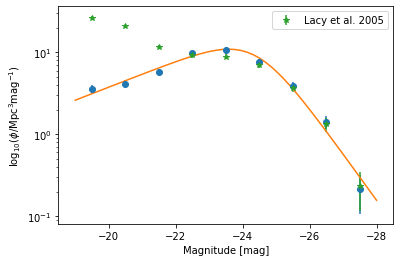

In [15]:
ax.errorbar(vmax_counts[0], vmax_counts[2], yerr=vmax_counts[3], fmt='*', label='Lacy et al. 2005')
ax.legend()
fig

In [16]:
len(lacy_selected)

3498

Beta: [  3.47334357 -26.35598695  -1.31711382  -3.56456766]
Beta Std Error: [1.01151238 0.4787489  0.04034973 1.11979552]
Beta Covariance: [[0.51361993 0.20860249 0.01771107 0.34514736]
 [0.20860249 0.11505753 0.00530071 0.19202547]
 [0.01771107 0.00530071 0.0008173  0.00848278]
 [0.34514736 0.19202547 0.00848278 0.62947271]]
Residual Variance: 1.9920514073339297
Inverse Condition #: 0.011663206588364417
Reason(s) for Halting:
  Sum of squares convergence


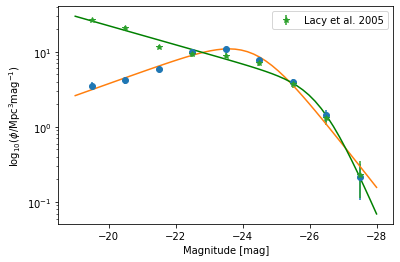

In [17]:
odr_out = xi2.odr_fit(*vmax_counts, initial_guesses=(18, -24, 0, -2))
x_vals = np.linspace(min(bins), max(bins))
ax.plot(x_vals, xi2.double_power_law(odr_out.beta, x_vals), 'g-')
fig

In [18]:
fig.savefig('/Users/runburg/github/agn_lf/lacy_lf.png')

TypeError: Image data of dtype object cannot be converted to float

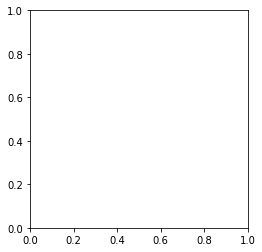

In [28]:
trial = fits.open('/Users/runburg/Downloads/swire_XMM_I1_tile_3_3_v4_unc.fits', memmap=True)
plt.imshow(trial, cmap='gray')

In [22]:
trial.data

AttributeError: 'HDUList' object has no attribute 'data'

In [23]:
trial

In [24]:
trial[0]

In [26]:
trial[0].header

SIMPLE  =                    T / Written by IDL:  Thu Apr 20 19:59:41 2006      
BITPIX  =                  -32 / Bits per pixel- floating point                 
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 4800 /  Axis Length                                   
NAXIS2  =                 5000 /  Axis Length                                   
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    1 / 1 digit instrument channel number              
EXPTYPE = 'sci     '           / Exposure Type                                  
FOVID   =                   81 / Field of View ID                               
FOVNAME = 'IRAC_FOV_bwn_3.6&5.8_and_4.5&8.0_for_mapping' / Field of View Name   
OBSRVR  = 'Carol Lonsdale'     / Observer Name (Last, First)                    
OBSRVRID=                   